<a href="https://colab.research.google.com/github/vigneshbaskar1410/Machine-Learning-Projects/blob/main/Classification_Using_XGBoost_and_Random_Forest_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification using XGBoost and Random Forest**

# **1.	Import Libraries/Dataset**

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score,roc_curve
from sklearn.model_selection import cross_val_predict


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving credit_card_defaulter.csv to credit_card_defaulter (2).csv


In [ ]:
data=pd.read_csv('credit_card_defaulter.csv')
data

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.37891
9996,9997,No,No,757.962918,19660.72177
9997,9998,No,No,845.411989,58636.15698
9998,9999,No,No,1569.009053,36669.11236


In [ ]:
data.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [ ]:
data.tail()

,Unnamed: 0,default,student,balance,income
9995,9996,No,No,711.555020,52992.37891
9996,9997,No,No,757.962918,19660.72177
9997,9998,No,No,845.411989,58636.15698
9998,9999,No,No,1569.009053,36669.11236
9999,10000,No,Yes,200.922183,16862.95232


In [ ]:
data.describe()

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462905
50%,5000.50000,823.636973,34552.644800
75%,7500.25000,1166.308387,43807.729275
max,10000.00000,2654.322576,73554.233500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [ ]:
data.columns

Index(['Unnamed: 0', 'default', 'student', 'balance', 'income'], dtype='object')

## **2.	Data Visualisation and Augmentation**
• Plot at least two EDA graphs (use matplotlib/seaborn/any other library)

• Prepare data to be able to build the model

• Bring the train and test data in the required format

• Perform missing values check

• Perform scaling of data

• Print the shapes of train and test data

<function matplotlib.pyplot.show(*args, **kw)>

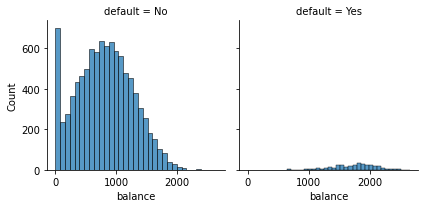

In [ ]:
viz=sns.FacetGrid(data,col="default")
viz.map(sns.histplot,"balance",bins=30)
plt.show

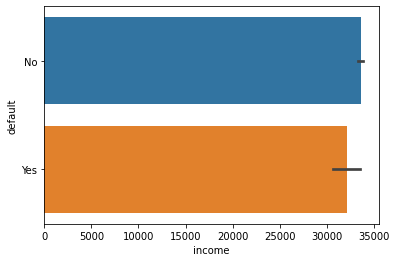

In [ ]:
sns.barplot(y='default',x='income',data=data)

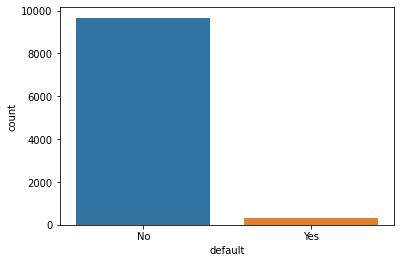

In [ ]:
sns.countplot(x='default',data=data)

# **Checking Missing Values**

In [ ]:
data.isnull().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

# **3.Preparing data to build a classification model**

In [ ]:
le= preprocessing.LabelEncoder()
data['student']= le.fit_transform(data.student.values)
data['default']= le.fit_transform(data.default.values)

In [ ]:
df = data.iloc[:,1:]
x=df.drop("default",axis=1)
y=df["default"]
x

,student,balance,income
0,0,729.526495,44361.62507
1,1,817.180407,12106.13470
2,0,1073.549164,31767.13895
3,0,529.250605,35704.49394
4,0,785.655883,38463.49588
...,...,...,...
9995,0,711.555020,52992.37891
9996,0,757.962918,19660.72177
9997,0,845.411989,58636.15698
9998,0,1569.009053,36669.11236


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: default, Length: 10000, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

# **Scaling of Data**

In [ ]:
ss=StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# **Printing the shapes of train and test data**

In [ ]:
X_train_scaled.shape

(7000, 3)

In [ ]:
X_test_scaled.shape

(3000, 3)

In [ ]:
y_train.shape

(7000,)

In [ ]:
y_test.shape

(3000,)

# **4.Random Forest Classifier Model Building**

• Build a random forest classification Model

• Train the model on the train dataset

• Print the model summary

In [ ]:
ran_for = RandomForestClassifier(n_estimators = 50, random_state=42, n_jobs = -1)
ran_for.fit(X_train_scaled, y_train)
roc_auc_scores=roc_auc_score(y_test,ran_for.predict(X_test_scaled))
accuracy_scores=accuracy_score(y_test,ran_for.predict(X_test_scaled))

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [ ]:
print("roc_auc_score:", roc_auc_scores)
print("accuracy_score:",accuracy_scores)

roc_auc_score: 0.6559612540451889
accuracy_score: 0.9716666666666667


# **Model Evaluation for Random Forest Classifier**

0.9997142857142857

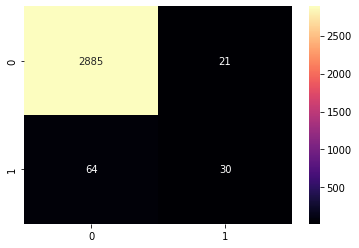

In [ ]:
y_predict_ran_for= ran_for.predict(X_test_scaled)
ran_for.score(X_train_scaled,y_train)
colormap = plt.cm.magma
con_mat = confusion_matrix(y_test,y_predict_ran_for)
sns.heatmap(con_mat,cmap= colormap,annot=True,fmt='g')

In [ ]:
score_ran_for= y_test,y_predict_ran_for
print("precision:{:.2f}%".format(precision_score(*score_ran_for)))
print("recall:{:.2f}%".format(recall_score(*score_ran_for)))
print("f1-score:{:.2f}%".format(f1_score(*score_ran_for)))


precision:0.59%
recall:0.32%
f1-score:0.41%


# **Plotting ROC Curve For Random Forest Classifier**

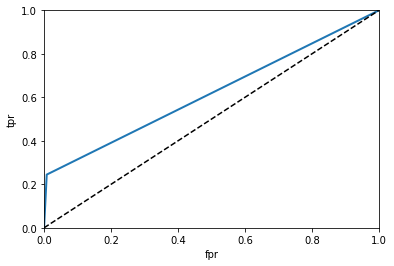

In [ ]:
y_scores_ran_for = cross_val_predict(ran_for,X_test_scaled,y_test,cv=6)
fpr,tpr,thresholds = roc_curve(y_test,y_scores_ran_for)

def roc_curve_plot(fpr,tpr):
  plt.plot(fpr,tpr,linewidth=2)
  plt.plot([0,1],[0,1],'k--')
  plt.axis([0,1,0,1])
  plt.xlabel("fpr")
  plt.ylabel("tpr")

roc_curve_plot(fpr,tpr)

# **5. XGBoost Classifier Model Building**

• Build a XGBoost classification Model

• Train the model on the train dataset

• Print the model summary

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled,y_train)
roc_auc_scores=roc_auc_score(y_test,xgb.predict(X_test_scaled))
accuracy_scores=accuracy_score(y_test,xgb.predict(X_test_scaled))

XGBClassifier()

In [ ]:
print("roc_auc_score:", roc_auc_scores)
print("accuracy_score:",accuracy_scores)

roc_auc_score: 0.6463553030413963
accuracy_score: 0.973


# **Model Evaluation for XGBoost Classifier**

0.9764285714285714

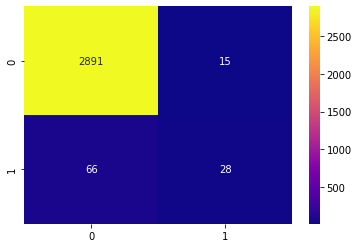

In [ ]:
y_predict_xgb= xgb.predict(X_test_scaled)
xgb.score(X_train_scaled,y_train)
colormap = plt.cm.plasma
con_mat = confusion_matrix(y_test,y_predict_xgb)
sns.heatmap(con_mat,cmap= colormap,annot=True,fmt='g')

In [ ]:
y_predict_xgb = xgb.predict(X_test_scaled)

In [ ]:
score_xgb= y_test,y_predict_xgb
print("precision:{:.2f}%".format(precision_score(*score_xgb)))
print("recall:{:.2f}%".format(recall_score(*score_xgb)))
print("f1-score:{:.2f}%".format(f1_score(*score_xgb)))

precision:0.65%
recall:0.30%
f1-score:0.41%


# **Plotting ROC Curve For XGBoost Classifier**

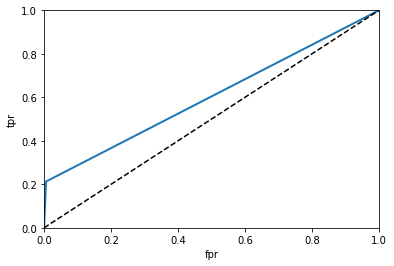

In [ ]:
y_scores_xgb = cross_val_predict(xgb,X_test_scaled,y_test,cv=6)
fpr,tpr,thresholds = roc_curve(y_test,y_scores_xgb)

def roc_curve_plot(fpr,tpr):
  plt.plot(fpr,tpr,linewidth=2)
  plt.plot([0,1],[0,1],'k--')
  plt.axis([0,1,0,1])
  plt.xlabel("fpr")
  plt.ylabel("tpr")

roc_curve_plot(fpr,tpr)
